In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('data.csv')
df.head()

,city,year,month,day,co,no2,o3,so2
0,cincinnati,2012,1,1,0.44,12,0.0486,1
1,cincinnati,2012,1,2,0.17,8,0.0192,6
2,cincinnati,2012,1,3,0.08,10,0.0090,1
3,cincinnati,2012,1,4,0.59,8,0.0652,8
4,cincinnati,2012,1,5,0.38,10,0.0417,6


#### It is always good to highlight data point on your chart, give better story and point your users into the direction you want to. So let's,for instance, say you want to highlight one day on this plot with different color, say day 4 within cincinnati city. This could be used, in real life, for example to highlight your company in comparison to other competitors

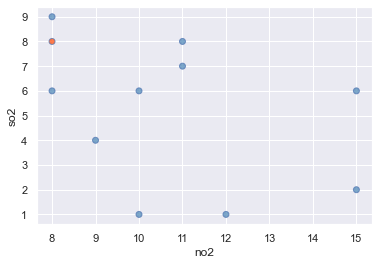

In [3]:
cinci_df = df[df.city == "cincinnati"]

## choosing the color to differeniate
cinci_color = ['orangered' if day==4 else 'steelblue'
              for day in cinci_df.day]

p = sns.regplot(x = 'no2',
                y = 'so2',
                data = cinci_df,
                fit_reg = False,
                scatter_kws = {'facecolors':cinci_color,'alpha':0.7})

#### Another example when you want to have multiple filters. Here we need to use Zip function to loop over several columns

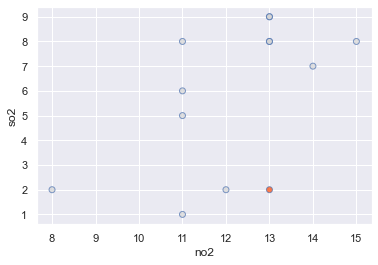

In [4]:
stockholm_pollution = df[df.city  =='stockholm']

# Make array orangred for day 3 of year 2012, otherwise lightgray
stockholm_colors = ['orangered' if (day==3) & (year==2012) else 'lightgray' 
                  for day,year in zip(stockholm_pollution.day, stockholm_pollution.year)]

sns.regplot(x = 'no2',
            y = 'so2',
            data = stockholm_pollution,
            fit_reg = False, 
            # Send scatterplot argument to color points
            scatter_kws = {'facecolors': stockholm_colors, 'alpha': 0.7})
plt.show()

#### Using calculation like Max to highlight specific datapoint/datapoints. It is one way to highlight something on your chart dynamically (in case you don't already know the point you want to highlight for instance)

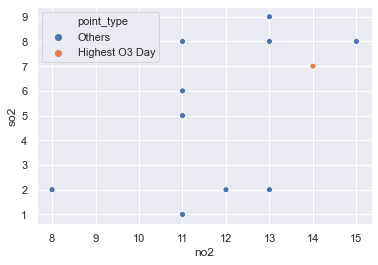

In [5]:
stockholm_pollution = df[df.city  == 'stockholm'].copy()

# Find the highest observed O3 value
max_O3 = stockholm_pollution.o3.max()

# Make a column that denotes which day had highest O3
stockholm_pollution['point_type'] = ['Highest O3 Day' if o3  ==  max_O3 else 'Others' for o3 in stockholm_pollution.o3]

# Encode the hue of the points with the O3 generated column
sns.scatterplot(x = 'no2',
                y = 'so2',
                hue = 'point_type',
                data = stockholm_pollution)
plt.show()

#### Comparing groups. It is good to clean the chart as much as possible

Let's say we want to see stockholm vs cincinnati, Or Stockholm vs Other Cities

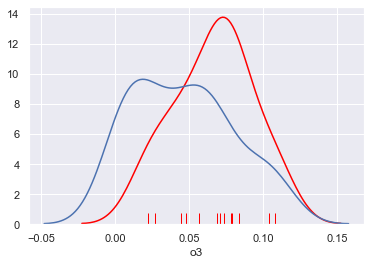

In [7]:
sns.distplot(df[df.city == 'stockholm'].o3, hist = False, color = 'red', rug = True)
sns.distplot(df[df.city != 'stockholm'].o3, hist = False)

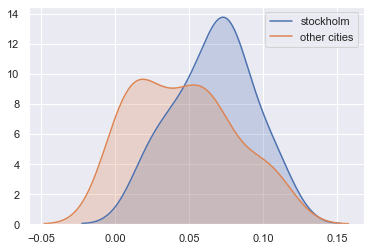

In [8]:
# Filter dataset to the year 2012
sns.kdeplot(df[df.city == 'stockholm'].o3, 
            # Shade under kde and add a helpful label
            shade = True,
            label = 'stockholm')

# Filter dataset to everything except the year 2012
sns.kdeplot(df[df.city != 'stockholm'].o3, 
            # Again, shade under kde and add a helpful label           
            shade = True,
            label = 'other cities')
plt.show()

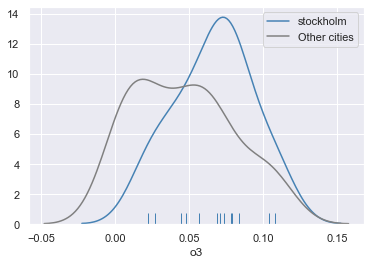

In [9]:
sns.distplot(df[df.city == 'stockholm'].o3, 
             label = 'stockholm',
                # Turn of the histogram and color blue to stand out
               hist = False, 
             color = 'steelblue',  
               # Turn on rugplot
               rug = True)

sns.distplot(df[df.city != 'stockholm'].o3,
             label = 'Other cities',
               # Turn off histogram and color gray
               hist = False,
             color = 'gray')
plt.show()

### KDE gets busy easily so in case we want to compare several data group, another way is swarm plot

Text(0.5, 0, 'Ozon (o3)')

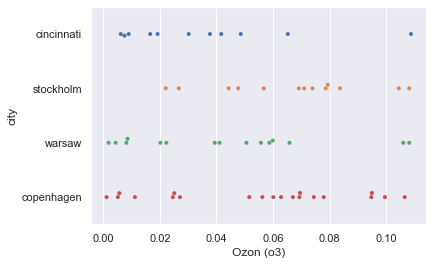

In [10]:
sns.swarmplot(y = 'city', x ='o3', data = df, size = 4)
plt.xlabel("Ozon (o3)")

## Annotations

##### Not my favorit and it works well when need to convey a specific message to users. However, don't forget the golden rule: Keep it simple

Text(16, 7, 'Look at this')

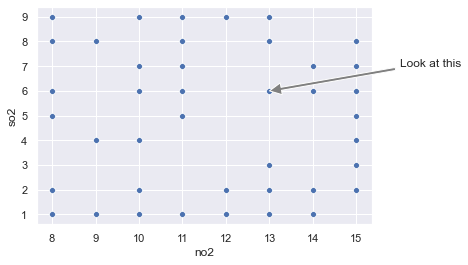

In [11]:
sns.scatterplot(x = 'no2', y = 'so2', data = df)
## Arrow start
plt.annotate('Look at this', xy =(13,6), xytext=(16,7), 
            ## Arrow config and background
            arrowprops = {'facecolor':'grey', 'width':3}, backgroundcolor = 'white')

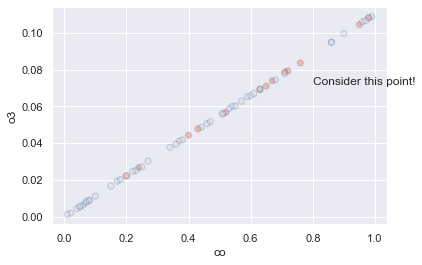

In [12]:
# Make a vector where Long Beach is orangered; else lightgray
is_stlk = ['orangered' if city  ==  'stockholm' else 'lightgray' for city in df['city']]

# Map facecolors to the list is_lb and set alpha to 0.3
sns.regplot(x = 'co',
            y = 'o3',
            data = df,
            fit_reg = False, 
            scatter_kws = {'facecolors':is_stlk, 'alpha':0.3})


# Add annotation to plot
plt.text(0.8, 0.072, 'Consider this point!')
plt.show() 

### Color Manipulation

#### Pay special attention to colors when presenting visulizations. Depending on the context colorfull viz can be either helpfull or harmfull

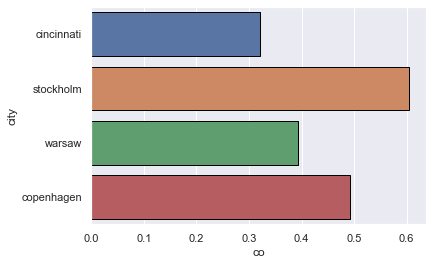

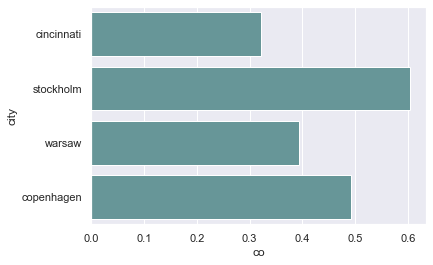

In [13]:
sns.barplot(y = 'city', x = 'co', 
              estimator = np.mean,
            ci = False,
              data = df,
              # Add a border to the bars
              edgecolor = 'black')
plt.show()

## Or this?
sns.barplot(y = 'city', x = 'co', 
              estimator = np.mean,
            ci = False,
              data = df,
              # Replace border with bar colors
              color = 'cadetblue')
plt.show()

Text(0.5, 12.5, 'Day of month')

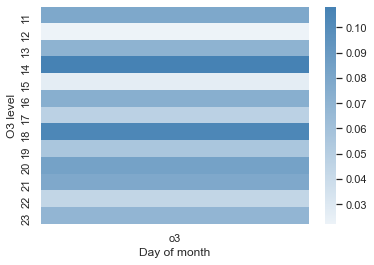

In [14]:
stockholm_jan = df.query("month == 1 & city == 'stockholm'")
usingBlueScale = sns.light_palette("steelblue", as_cmap= True)
sns.heatmap(stockholm_jan[["o3"]], cmap = usingBlueScale)
plt.ylabel("O3 level")
plt.xlabel("Day of month")

## Remember the column need to be list of list

Text(0.5, 12.5, 'Day of month')

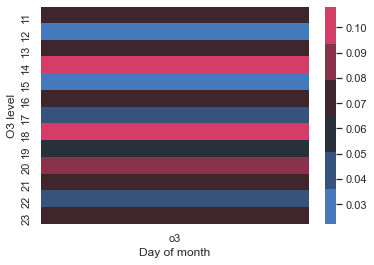

In [15]:
## Alternatively if you use the common Jet palette 
stockholm_jan = df.query("month == 1 & city == 'stockholm'")
pal_dark = sns.diverging_palette(250,0, center='dark')
sns.heatmap(stockholm_jan[["o3"]], cmap = pal_dark)
plt.ylabel("O3 level")
plt.xlabel("Day of month")

Text(0.5, 12.5, 'Day of month')

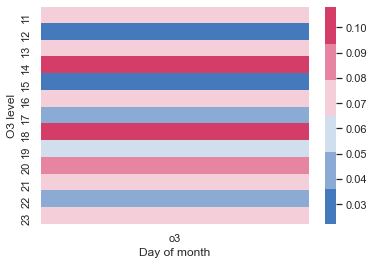

In [16]:
pal_light = sns.diverging_palette(250,0)
sns.heatmap(stockholm_jan[["o3"]], cmap = pal_light)
plt.ylabel("O3 level")
plt.xlabel("Day of month")

### How to deal with categorical data i.e not numbers?

Here we can try to map them - like create another column that hold the categories we want and plot the data accordingly

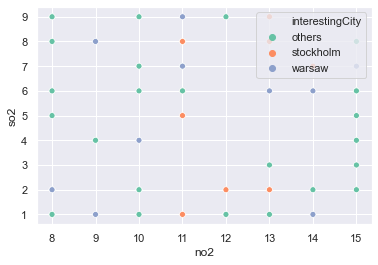

In [17]:
df['interestingCity'] = [x if x in ['stockholm', 'warsaw']
                        else 'others' for x in df.city]
sns.scatterplot(x='no2', y='so2', data = df, hue ='interestingCity',palette ='Set2')
plt.legend(loc='upper right')

#### Good reference to color choice

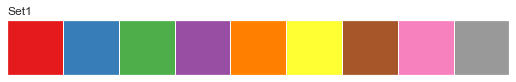

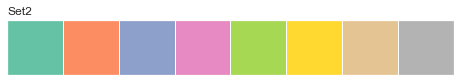

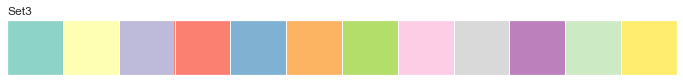

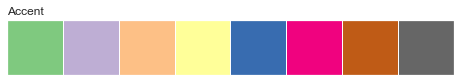

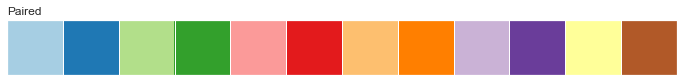

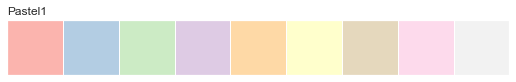

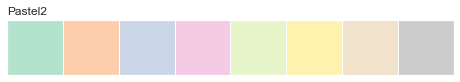

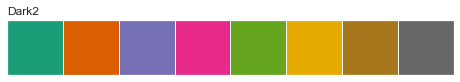

In [18]:
## Away to choose different palette as below for categorical data
color_browser = ['Set1','Set2','Set3','Accent', 'Paired','Pastel1','Pastel2','Dark2']

for pal in color_browser:
    sns.palplot(pal=sns.color_palette(pal))
    plt.title(pal,loc='left')

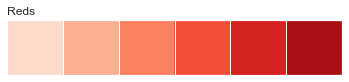

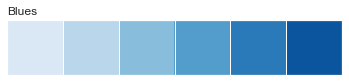

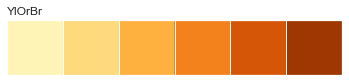

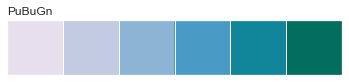

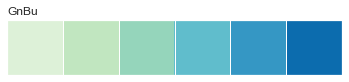

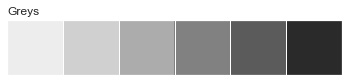

In [19]:
## Away to choose different palette as below for ordinal data
color_browser_2 = ['Reds','Blues','YlOrBr','PuBuGn', 'GnBu','Greys']

for pal in color_browser_2:
    sns.palplot(pal=sns.color_palette(pal))
    plt.title(pal,loc='left')

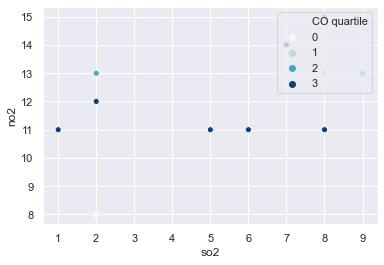

In [20]:
# Divide CO into quartiles
df['CO quartile'] = pd.qcut(df['co'], q = 4, labels = False)

# Filter to just stockholm
stockholm_ = df.query("city  ==  'stockholm'")

# Color points with by quartile and use ColorBrewer palette
sns.scatterplot(x = 'so2',
                y = 'no2',
                hue = 'CO quartile', 
                  data = stockholm_,
                palette = 'GnBu')
plt.legend(loc='upper right')
plt.show()

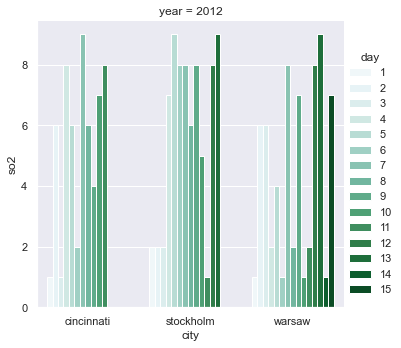

In [21]:
# Reduce to just cities we want
cities = ['stockholm', 'warsaw', 'cincinnati']


# Filter data to desired cities
city_maxes = df[df.city.isin(cities)]

# Swap city and day encodings
sns.catplot(x = 'city', hue = 'day',
              y = 'so2', row = 'year',
              # Change palette to one appropriate for ordinal categories
              data = city_maxes, palette = 'BuGn',
              sharey = False, kind = 'bar')
plt.show()